In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Data Cleaning

In [2]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

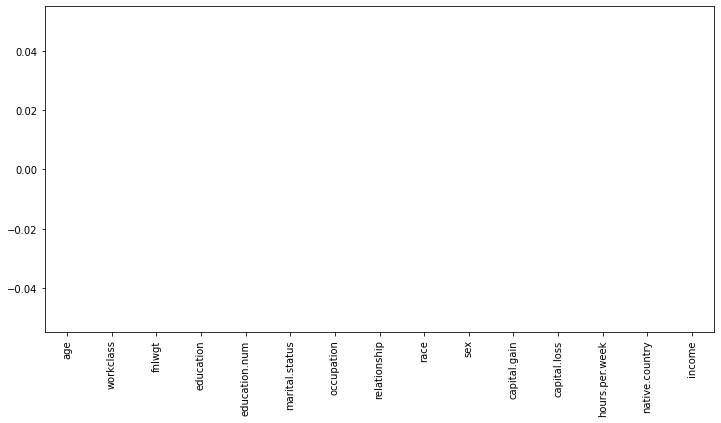

In [4]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

This tells us the dataset has no missing values, but upon inspection, we see several columns having "?" as values.

In [5]:
df["workclass"]=df["workclass"].replace("?",np.nan)
df["occupation"]=df["occupation"].replace("?",np.nan)
df["native.country"]=df["native.country"].replace("?",np.nan)

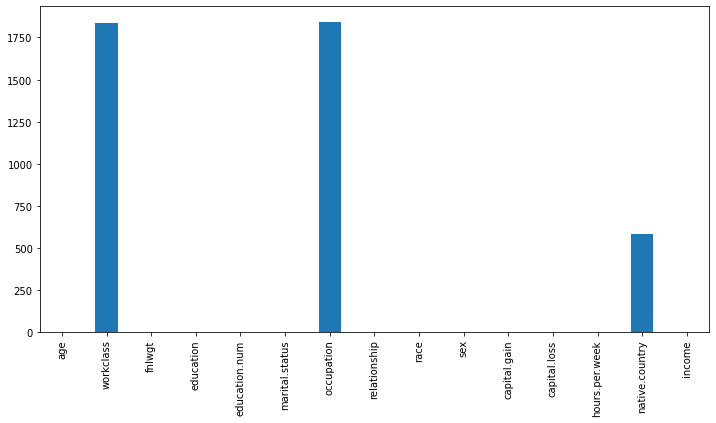

In [6]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

Let's see how much data we would lose if we just dropped the null values.

In [10]:
df2 = df.dropna()
percent_dropped = (df.shape[0] - df2.shape[0])/df.shape[0]*100
print(percent_dropped)

7.367709836921471


7% is significant so let's replace the values with the mode of each column

In [11]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native.country"]=df["native.country"].fillna(df["native.country"].mode()[0])

We should also check for duplicates and only keep one of each unique value.

In [12]:
df.duplicated().sum()

24

In [13]:
df=df.drop_duplicates(keep="first")

# Data Analysis